In [1]:
import scipy.stats as st
from scipy.stats import t
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/minsu/Downloads/문제2.csv', sep=',', encoding='utf-8')

In [7]:
grouped1 = df.groupby(df['온도'])
grouped1.mean()

,압력,수율
온도,,
80,4.5,89.0625
85,4.5,90.3875
90,4.5,86.2500


<AxesSubplot:>

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLA

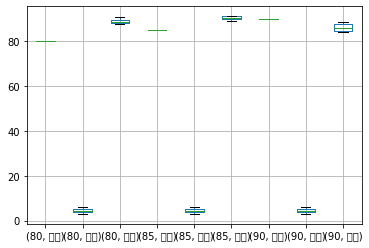

In [8]:
grouped1.boxplot(subplots=False)

In [9]:
grouped2 = df.groupby(df['압력'])
grouped2.mean()

,온도,수율
압력,,
3,85.0,87.783333
4,85.0,89.083333
5,85.0,87.600000
6,85.0,89.800000


<AxesSubplot:>

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLA

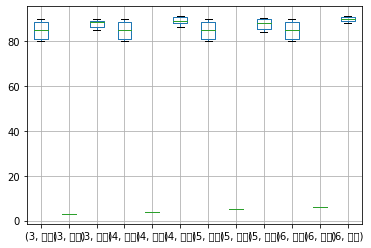

In [10]:
grouped2.boxplot(subplots=False)

In [41]:
#분산분석
model = ols('수율 ~ 온도 + 압력', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
온도,1.0,31.640625,31.640625,10.077186,0.004566
압력,1.0,6.256333,6.256333,1.992572,0.172718
Residual,21.0,65.936375,3.139827,NaN,NaN


In [45]:
# 유의수준 5%이내에서 p값이 0.004566이므로 귀무가설을 기각하고 대립가설 채택

#귀무가설 : 온도 이외 압력이 수율에 영향을 미친다

#대립가설 : 온도 이외 압력이 수율에 영향을 미친다

In [46]:
t_025 = t(21).ppf(0.975)
VE = 3.139827
m=1

t_stat = t_025*np.sqrt(VE/m)

print("t_025:{}".format(t_025))
print("t_stat:{}".format(t_stat))

t_025:2.079613844727662
t_stat:3.68498360434303


In [50]:
df2 = grouped2.mean()
df2

,온도,수율
압력,,
3,85.0,87.783333
4,85.0,89.083333
5,85.0,87.600000
6,85.0,89.800000


In [51]:
for idx, row in df2.iterrows():
    print(f'{idx}:{row[0]}')

3:85.0
4:85.0
5:85.0
6:85.0


In [56]:
for idx, row in df2.iterrows():
    print(f"{idx}압력 신뢰구간: {row[0]-t_stat}<=mu<={row[0]+t_stat}")

3압력 신뢰구간: 81.31501639565697<=mu<=88.68498360434303
4압력 신뢰구간: 81.31501639565697<=mu<=88.68498360434303
5압력 신뢰구간: 81.31501639565697<=mu<=88.68498360434303
6압력 신뢰구간: 81.31501639565697<=mu<=88.68498360434303


In [40]:
#신뢰구간 95% 추정

In [ ]:
from statsmodels.graphics.factorpiots import interaction_plot
fig = interaction_plot(df2.온도,df2.압력,df2.수율)

In [ ]:
fig = interaction_plot(df2.온도, df2.압력, df2.수율)

In [58]:
#교호작용 그래프